In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('all_plays_features.csv')

In [95]:
df.head()

,play_uuid,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,...,timestamp,cumulativeOverall_O,cumulativeOverall_D,cumulativeOverall_P,cumulativePerFormation_O,cumulativePerFormation_D,cumulativePerFormation_P,cumulativePerBoxCt_O,cumulativePerBoxCt_D,cumulativePerBoxCt_P
0,2.022091e+09,2022090800,101,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,...,2022-09-08 20:25:08.200000,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.500000,0.0
1,2.022091e+09,2022090800,1030,52536,Gabe Davis,(11:44) (Shotgun) J.Allen pass short left to G...,2,3,2,BUF,...,2022-09-08 21:01:44.799999,0.444444,0.555556,0.5,0.363636,0.636364,0.0,0.000000,0.000000,0.0
2,2.022091e+09,2022090800,1102,52494,Zack Moss,"(9:37) (No Huddle, Shotgun) J.Allen pass short...",2,2,6,BUF,...,2022-09-08 21:03:51.299999,0.473684,0.526316,0.0,0.416667,0.583333,0.0,0.437500,0.562500,0.0
3,2.022091e+09,2022090800,1187,47853,Darrell Henderson,(8:48) D.Henderson right tackle to LA 44 for 4...,2,1,10,LAR,...,2022-09-08 21:08:54.200000,0.200000,0.800000,0.0,0.000000,1.000000,0.0,0.142857,0.857143,0.0
4,2.022091e+09,2022090800,122,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,...,2022-09-08 20:25:51.000000,0.333333,0.666667,0.0,0.000000,1.000000,0.0,0.333333,0.666667,0.0


In [126]:
df['quarter'].value_counts()

quarter
4    3301
2    3267
1    2922
3    2893
5      98
Name: count, dtype: int64

In [96]:
len(df)

12481

In [97]:
df.columns

Index(['play_uuid', 'gameId', 'playId', 'ballCarrierId',
       'ballCarrierDisplayName', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'converted',
       'blocked', 'playType', 'ballDirection', 'timestamp',
       'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P',
       'cumulativePerFormation_O', 'cumulativePerFormation_D',
       'cumulativePerFormation_P', 'cu

In [115]:
existing_features_to_keep = ['ballCarrierId', 'quarter', 'yardsToGo', 'playResult', 'preSnapHomeScore',
       'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox',
        'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
        'visitorTeamWinProbilityAdded', 'down']

In [116]:
created_features_to_keep = ['converted', 'playType', 'ballDirection', 'cumulativeOverall_O', 
        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P']

In [110]:
features_to_keep = ['ballCarrierId', 'quarter', 'yardsToGo', 'playResult', 'offenseFormation', 'defendersInTheBox',
        'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
        'visitorTeamWinProbilityAdded', 'down', 'converted', 'playType', 'ballDirection', 'cumulativeOverall_O', 
        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P']

In [117]:
df = df[created_features_to_keep + existing_features_to_keep]
df.head()

,converted,playType,ballDirection,cumulativeOverall_O,cumulativeOverall_D,cumulativeOverall_P,cumulativePerFormation_O,cumulativePerFormation_D,cumulativePerFormation_P,cumulativePerBoxCt_O,...,playResult,preSnapHomeScore,preSnapVisitorScore,offenseFormation,defendersInTheBox,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,down
0,0,not_pass,right,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.500000,...,7,0,0,I_FORM,6.0,0.399819,0.600181,-0.014850,0.014850,1
1,1,pass,left,0.444444,0.555556,0.5,0.363636,0.636364,0.0,0.000000,...,10,0,7,SHOTGUN,5.0,0.221376,0.778624,-0.025333,0.025333,3
2,0,pass,left,0.473684,0.526316,0.0,0.416667,0.583333,0.0,0.437500,...,2,0,7,SHOTGUN,6.0,0.168558,0.831442,0.001122,-0.001122,2
3,0,not_pass,right,0.200000,0.800000,0.0,0.000000,1.000000,0.0,0.142857,...,4,0,10,SINGLEBACK,6.0,0.207237,0.792763,0.006345,-0.006345,1
4,1,pass,right,0.333333,0.666667,0.0,0.000000,1.000000,0.0,0.333333,...,6,0,0,SHOTGUN,6.0,0.384969,0.615031,-0.019032,0.019032,2


In [118]:
corr_df = pd.get_dummies(df)
corr_df.head()

,converted,cumulativeOverall_O,cumulativeOverall_D,cumulativeOverall_P,cumulativePerFormation_O,cumulativePerFormation_D,cumulativePerFormation_P,cumulativePerBoxCt_O,cumulativePerBoxCt_D,cumulativePerBoxCt_P,...,ballDirection_middle,ballDirection_none,ballDirection_right,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_JUMBO,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,offenseFormation_WILDCAT
0,0,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.500000,0.0,...,False,False,True,False,True,False,False,False,False,False
1,1,0.444444,0.555556,0.5,0.363636,0.636364,0.0,0.000000,0.000000,0.0,...,False,False,False,False,False,False,False,True,False,False
2,0,0.473684,0.526316,0.0,0.416667,0.583333,0.0,0.437500,0.562500,0.0,...,False,False,False,False,False,False,False,True,False,False
3,0,0.200000,0.800000,0.0,0.000000,1.000000,0.0,0.142857,0.857143,0.0,...,False,False,True,False,False,False,False,False,True,False
4,1,0.333333,0.666667,0.0,0.000000,1.000000,0.0,0.333333,0.666667,0.0,...,False,False,True,False,False,False,False,True,False,False


In [119]:
corr_df.columns

Index(['converted', 'cumulativeOverall_O', 'cumulativeOverall_D',
       'cumulativeOverall_P', 'cumulativePerFormation_O',
       'cumulativePerFormation_D', 'cumulativePerFormation_P',
       'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P',
       'ballCarrierId', 'quarter', 'yardsToGo', 'playResult',
       'preSnapHomeScore', 'preSnapVisitorScore', 'defendersInTheBox',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'down',
       'playType_not_pass', 'playType_pass', 'ballDirection_left',
       'ballDirection_middle', 'ballDirection_none', 'ballDirection_right',
       'offenseFormation_EMPTY', 'offenseFormation_I_FORM',
       'offenseFormation_JUMBO', 'offenseFormation_PISTOL',
       'offenseFormation_SHOTGUN', 'offenseFormation_SINGLEBACK',
       'offenseFormation_WILDCAT'],
      dtype='object')

In [120]:
corr_df.dtypes

converted                             int64
cumulativeOverall_O                 float64
cumulativeOverall_D                 float64
cumulativeOverall_P                 float64
cumulativePerFormation_O            float64
cumulativePerFormation_D            float64
cumulativePerFormation_P            float64
cumulativePerBoxCt_O                float64
cumulativePerBoxCt_D                float64
cumulativePerBoxCt_P                float64
ballCarrierId                         int64
quarter                               int64
yardsToGo                             int64
playResult                            int64
preSnapHomeScore                      int64
preSnapVisitorScore                   int64
defendersInTheBox                   float64
preSnapHomeTeamWinProbability       float64
preSnapVisitorTeamWinProbability    float64
homeTeamWinProbabilityAdded         float64
visitorTeamWinProbilityAdded        float64
down                                  int64
playType_not_pass               

In [121]:
# Create the correlation matrix and table
correlation_matrix = corr_df.corr()
correlation_table = corr_df.corr()

In [122]:
corr_converted = correlation_table['converted']
corr_converted = corr_converted.sort_values(ascending=False)
corr_converted.head(40)

converted                           1.000000
playResult                          0.588202
down                                0.295308
playType_pass                       0.246056
cumulativeOverall_P                 0.192328
cumulativePerFormation_P            0.135749
cumulativePerBoxCt_P                0.114064
offenseFormation_SHOTGUN            0.073484
ballDirection_middle                0.055056
offenseFormation_EMPTY              0.051853
cumulativePerFormation_O            0.037405
offenseFormation_JUMBO              0.021912
cumulativeOverall_D                 0.020945
preSnapVisitorScore                 0.013580
preSnapHomeScore                    0.010794
cumulativePerBoxCt_O                0.010750
homeTeamWinProbabilityAdded         0.010739
preSnapVisitorTeamWinProbability    0.005131
offenseFormation_WILDCAT            0.001853
quarter                            -0.001527
cumulativeOverall_O                -0.001587
preSnapHomeTeamWinProbability      -0.005131
visitorTea

In [123]:
len(corr_converted)

35

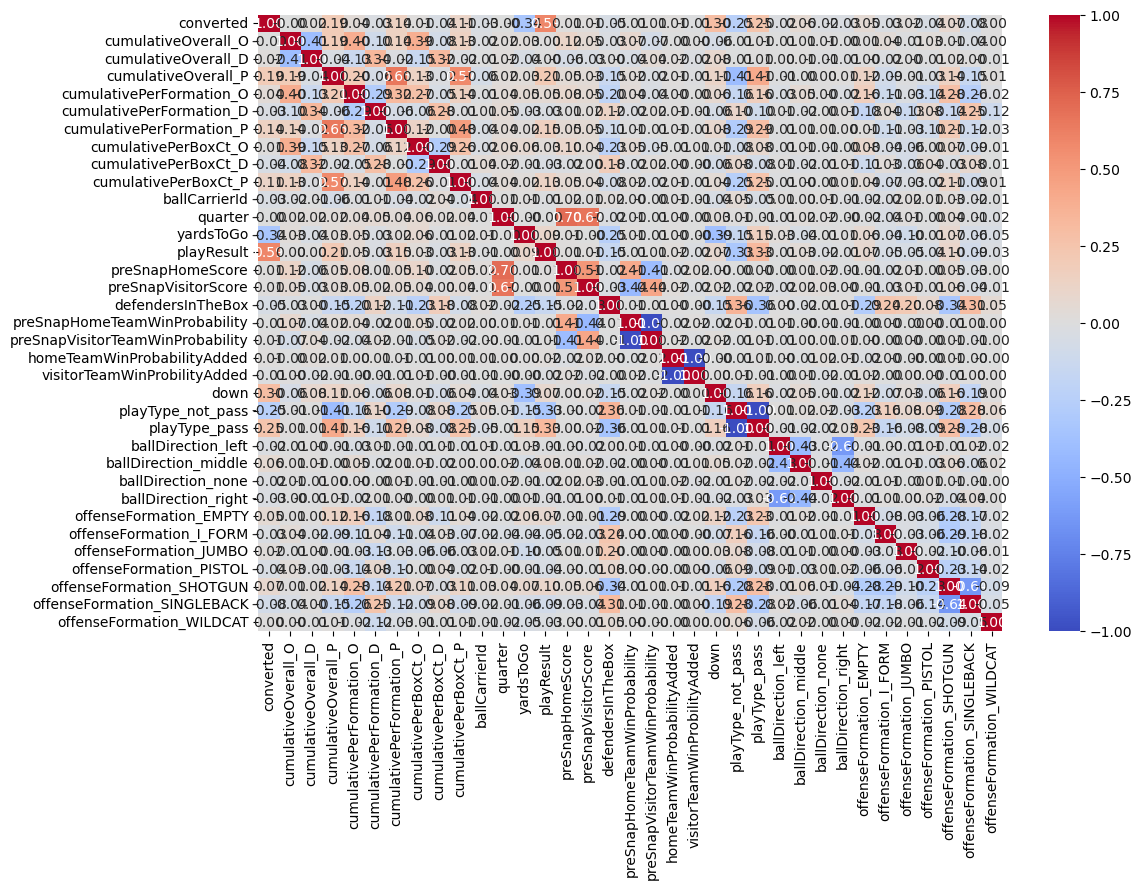

In [124]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()